In [1]:
import os
import pandas as pd
from pathlib import Path

# Metadata

In [11]:
ds = pd.read_csv('/home/bruno-pacheco/brain-age/MAPER_6_28_2022.csv')
ds.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I220542,011_S_0002,CN,M,74,1,MRI,MAPER segmentation,Post-processed,8/26/2005,NiFTI,6/23/2022
1,I220441,011_S_0005,CN,M,74,1,MRI,MAPER segmentation,Post-processed,9/02/2005,NiFTI,6/23/2022
2,I220442,011_S_0008,CN,F,85,1,MRI,MAPER segmentation,Post-processed,9/13/2005,NiFTI,6/23/2022
3,I220463,100_S_0015,CN,M,81,1,MRI,MAPER segmentation,Post-processed,9/26/2005,NiFTI,6/23/2022
4,I220444,011_S_0016,CN,M,66,1,MRI,MAPER segmentation,Post-processed,9/27/2005,NiFTI,6/23/2022


In [12]:
df = pd.read_csv('/home/bruno-pacheco/brain-age/MAPER_BRAINS_6_28_2022.csv')
df['Seg ID'] = None
df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,None
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,None
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,None
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,None
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,I60641,020_S_1288,CN,M,60,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/13/2007,NiFTI,NaN,None
281,I80718,094_S_1267,CN,M,73,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/16/2007,NiFTI,NaN,None
282,I75503,094_S_1267,CN,M,73,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/22/2007,NiFTI,NaN,None
283,I71395,013_S_1276,CN,F,72,2,MRI,MPR; GradWarp; N3; Scaled,Processed,3/28/2007,NiFTI,NaN,None


In [13]:
maper_ids = list()
for i in range(df.shape[0]):
    s = df.iloc[i]
    d = ds[(ds['Subject'] == s['Subject']) & (ds['Acq Date'] == s['Acq Date'])].iloc[0]

    df.iloc[i,-1] = d['Image Data ID']
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444


In [14]:
df.sample()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID
57,I34806,067_S_0177,CN,F,75,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/10/2006,NiFTI,NaN,I220529


In [15]:
ds[ds['Image Data ID'] == 'I220645']

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
221,I220645,130_S_0969,CN,M,70,2,MRI,MAPER segmentation,Post-processed,11/06/2006,NiFTI,6/23/2022


# Data check

In [16]:
maper_dir = Path('/data/slow/MAPER/ADNI')
!ls {maper_dir}

002_S_0295  012_S_1212	027_S_0118  052_S_1251	099_S_0533  128_S_0545
002_S_0413  013_S_0502	027_S_0120  057_S_0643	099_S_0534  128_S_0863
002_S_0559  013_S_0575	027_S_0403  057_S_0779	100_S_0015  128_S_1242
002_S_0685  013_S_1035	029_S_0824  057_S_0818	100_S_0035  129_S_0778
002_S_1261  013_S_1276	029_S_0843  057_S_0934	100_S_0047  130_S_0232
002_S_1280  014_S_0519	029_S_0845  062_S_0578	100_S_0069  130_S_0886
003_S_0907  014_S_0520	029_S_0866  062_S_0768	100_S_1286  130_S_0969
003_S_0931  014_S_0548	031_S_0618  062_S_1099	109_S_0876  130_S_1200
003_S_0981  014_S_0558	032_S_0095  067_S_0019	109_S_0967  131_S_0123
003_S_1021  016_S_0359	032_S_0479  067_S_0056	109_S_1013  131_S_0319
005_S_0223  016_S_0538	032_S_0677  067_S_0059	109_S_1014  131_S_0436
005_S_0553  018_S_0043	032_S_1169  067_S_0177	114_S_0166  131_S_0441
005_S_0602  018_S_0055	033_S_0516  067_S_0257	114_S_0173  131_S_1301
005_S_0610  018_S_0369	033_S_0734  068_S_0127	114_S_0416  133_S_0433
006_S_0498  018_S_0425	033_S_0741 

In [17]:
df['IMG'] = None
df['SEG'] = None

for i in range(df.shape[0]):
    s = df.loc[i]

    subject_dir = maper_dir/s['Subject']

    assert len(list(subject_dir.glob(f"**/*{s['Image Data ID']}*"))) == 1, 'img'
    assert len(list(subject_dir.glob(f"**/*{s['Seg ID']}*"))) == 1, 'seg'

    img_fpath = next(subject_dir.glob(f"**/*{s['Image Data ID']}*"))
    seg_fpath = next(subject_dir.glob(f"**/*{s['Seg ID']}*"))

    df.loc[i,'IMG'] = str(img_fpath)
    df.loc[i,'SEG'] = str(seg_fpath)

assert df['IMG'].apply(os.path.exists).all()
assert df['SEG'].apply(os.path.exists).all()

In [18]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID,IMG,SEG
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542,/data/slow/MAPER/ADNI/011_S_0002/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0002/MAPER_segment...
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441,/data/slow/MAPER/ADNI/011_S_0005/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0005/MAPER_segment...
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442,/data/slow/MAPER/ADNI/011_S_0008/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0008/MAPER_segment...
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463,/data/slow/MAPER/ADNI/100_S_0015/MPR-R____N3__...,/data/slow/MAPER/ADNI/100_S_0015/MAPER_segment...
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444,/data/slow/MAPER/ADNI/011_S_0016/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0016/MAPER_segment...


In [19]:
s = df.sample().iloc[0]
s

Image Data ID                                               I49479
Subject                                                 082_S_0640
Group                                                           CN
Sex                                                              F
Age                                                             73
Visit                                                            1
Modality                                                       MRI
Description               MPR; GradWarp; B1 Correction; N3; Scaled
Type                                                     Processed
Acq Date                                                 7/03/2006
Format                                                       NiFTI
Downloaded                                                     NaN
Seg ID                                                     I220850
IMG              /data/slow/MAPER/ADNI/082_S_0640/MPR__GradWarp...
SEG              /data/slow/MAPER/ADNI/082_S_0640/MAPER_segmen

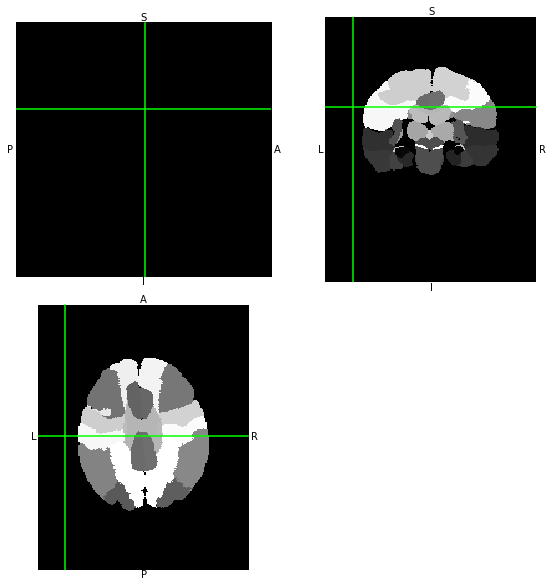

In [84]:
from brats.utils import show_mri

show_mri(s['SEG'], pos=(0,0,0))

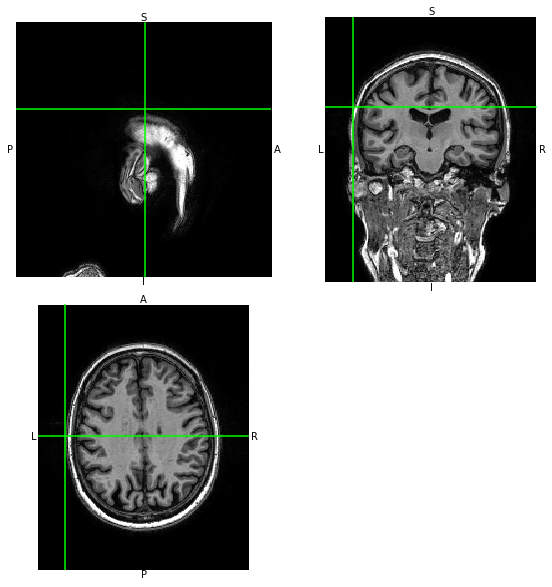

In [85]:
from brats.utils import show_mri

show_mri(s['IMG'], pos=(0,0,0))

In [20]:
df_split = pd.read_csv('/home/bruno-pacheco/brain-age/notebooks/dataframe3D.csv', index_col=0)
df_split['id'] = df_split['patient'].str.replace('ADNI_','')
df_split['id'].value_counts()

023_S_0031    16
116_S_0382    16
023_S_1190    15
116_S_1249    14
037_S_0303    14
              ..
094_S_6485     1
023_S_1306     1
041_S_4083     1
168_S_6285     1
126_S_0506     1
Name: id, Length: 666, dtype: int64

In [21]:
df['split'] = None

for i in range(df.shape[0]):
    s = df.loc[i]

    try:
        split = df_split[df_split['id'] == s['Subject']]['split'].iloc[0]
    except IndexError:
        split = 'train'
    df.loc[i,'split'] = split

assert df['split'].isin(['train', 'val', 'test']).all()

In [22]:
df['split'].value_counts()

train    167
test      61
val       57
Name: split, dtype: int64

In [23]:
# df.to_pickle('/data/slow/MAPER/prep/metadata.pkl')
df = pd.read_pickle(prep_dir/'metadata.pkl')

# Preprocessing

In [118]:
s = df.sample().iloc[0]
s

Image Data ID                                               I34698
Subject                                                 041_S_0898
Group                                                           CN
Sex                                                              F
Age                                                             83
Visit                                                            1
Modality                                                       MRI
Description               MPR; GradWarp; B1 Correction; N3; Scaled
Type                                                     Processed
Acq Date                                                10/18/2006
Format                                                       NiFTI
Downloaded                                                     NaN
Seg ID                                                     I220521
IMG              /data/slow/MAPER/ADNI/041_S_0898/MPR__GradWarp...
SEG              /data/slow/MAPER/ADNI/041_S_0898/MAPER_segmen

In [ ]:
from brats.preprocessing.nipype_wrappers import ants_registration, ants_transformation
from brats.preprocessing.hdbet_wrapper import hd_bet
from shutil import move
from tqdm.notebook import tqdm

TEMPLATE_FPATH = Path('/home/bruno-pacheco/brain-age/data/external/SRI24_T1.nii')

for s in tqdm(list(df.iloc)):
    reg_transform, _ = ants_registration(
        str(TEMPLATE_FPATH),
        s['IMG'],
        '.tmpdir/transf_',
    )

    prep_fpath = ants_transformation(
        s['IMG'],
        str(TEMPLATE_FPATH),
        [reg_transform,],
        '.tmpdir/sri24_',
    )

    prep_seg_fpath = ants_transformation(
        s['SEG'],
        str(TEMPLATE_FPATH),
        [reg_transform,],
        '.tmpdir/sri24_seg_',
        interpolation='NearestNeighbor',
    )

    brain_fpath = hd_bet(prep_fpath, '.tmpdir/brain_', mode='fast')[0]

    move(brain_fpath, f'/data/slow/MAPER/prep/X/ADNI_MAPER_{s.name}.nii.gz')
    
    float_seg = nib.load(prep_seg_fpath)
    int_img = nib.Nifti1Image(float_img.get_fdata().astype(int),header=float_img.header,affine=float_img.affine)
    int_img.header.set_data_dtype(int)
    nib.save(int_img, f'/data/slow/MAPER/prep/y/ADNI_MAPER_{s.name}_seg.nii.gz')
    !rm {prep_seg_fpath}

print('DONE')

Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_011_S_0002_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070108225928642_S9107_I35475.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_011_S_0005_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061208112603927_S9136_I32246.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_011_S_0008_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061208113853608_S9195_I32264.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_100_S_0015_MR_MPR-R____N3__Scaled_Br_20061213154536487_S9246_I33066.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_011_S_0016_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061208143604106_S9253_I32306.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_022_S_0014_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070712143051450_S9271_I59375.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_011_S_0022_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061208150933591_S9617_I32389.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_011_S_0021_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061208145032820_S9581_I32332.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_067_S_0019_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319180308737_S9539_I45228.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_023_S_0031_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070821182618561_S9785_I69612.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_100_S_0035_MR_MPR____N3__Scaled_Br_20061213155906774_S9959_I33074.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_023_S_0031_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20070427181838920_S10009_I51934.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_011_S_0023_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20061208151654929_S8868_I32409.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_100_S_0015_MR_MPR-R____N3__Scaled_Br_20061213152852376_S8833_I33046.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_067_S_0056_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070111005541331_S8723_I35893.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.
/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_100_S_0047_MR_MPR-R____N3__Scaled_Br_20061213161755301_S10215_I33086.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /home/bruno-pacheco/brain-age/notebooks/.tmpdir/sri24_ADNI_035_S_0048_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319171821233_S10257_I45183.nii
preprocessing...
image shape after preprocessing:  (103, 160, 160)
prediction (CNN id)...
0
running postprocessing... 
exporting segmentation...


/home/bruno-pacheco/HD-BET/HD_BET/utils.py:74: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=3
  lbls = label(mask, 8)
Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.


In [149]:
s

Image Data ID                                               I71694
Subject                                                 131_S_1301
Group                                                           CN
Sex                                                              F
Age                                                             72
Visit                                                            2
Modality                                                       MRI
Description                              MPR; GradWarp; N3; Scaled
Type                                                     Processed
Acq Date                                                 4/17/2007
Format                                                       NiFTI
Downloaded                                                     NaN
Seg ID                                                     I221236
IMG              /data/slow/MAPER/ADNI/131_S_1301/MPR__GradWarp...
SEG              /data/slow/MAPER/ADNI/131_S_1301/MAPER_segmen

In [188]:
from shutil import copy

normalizer = {l: i for i,l in enumerate(sorted(labels))}
vec_normalizer = np.vectorize(lambda v: normalizer[v])

nnunet_img_dir = Path('/home/bruno-pacheco/brats-generalization/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/imagesTr')
nnunet_label_dir = Path('/home/bruno-pacheco/brats-generalization/data/raw/nnUNet_raw_data/Task112_ADNI_MAPER/labelsTr')
for s in tqdm(df[df['split'] == 'train'].iloc):
    print('{')

#     copy(f'/data/slow/MAPER/prep/X/ADNI_MAPER_{s.name}.nii.gz', nnunet_img_dir/f'ADNI_MAPER_{s.name}_0000.nii.gz')
    print(f"\t\"image\": \"./imagesTr/ADNI_MAPER_{s.name}.nii.gz\",")
    
    seg = nib.load(f'/data/slow/MAPER/prep/y/ADNI_MAPER_{s.name}_seg.nii.gz')
    norm_seg = nib.Nifti1Image(vec_normalizer(seg.get_data()), header=seg.header, affine=seg.affine)
    nib.save(norm_seg, nnunet_label_dir/f'ADNI_MAPER_{s.name}.nii.gz')
    print(f"\t\"label\": \"./labelsTr/ADNI_MAPER_{s.name}.nii.gz\"")

    print('},')

{
	"image": "./imagesTr/ADNI_MAPER_1.nii.gz",


/tmp/ipykernel_1878750/1621707669.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  norm_seg = nib.Nifti1Image(vec_normalizer(seg.get_data()), header=seg.header, affine=seg.affine)


	"label": "./labelsTr/ADNI_MAPER_1.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_2.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_2.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_5.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_5.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_6.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_6.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_8.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_8.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_9.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_9.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_11.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_11.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_12.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_12.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_16.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_16.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_18.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_18.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_20.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_20.nii.gz"
},
{
	"image": "./imagesTr/

	"label": "./labelsTr/ADNI_MAPER_154.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_155.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_155.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_156.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_156.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_160.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_160.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_161.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_161.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_163.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_163.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_164.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_164.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_165.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_165.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_166.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_166.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_167.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_167.nii.gz"
},
{
	"image": "./imagesTr/ADNI_MAPER_169.nii.gz",
	"label": "./labelsTr/ADNI_MAPER_169.nii

In [189]:
for k,v in normalizer.items():
    print(f"\"{v}\": \"{k}\",")

"0": "0",
"1": "256",
"2": "512",
"3": "768",
"4": "1024",
"5": "1280",
"6": "1536",
"7": "1792",
"8": "2048",
"9": "2304",
"10": "2560",
"11": "2816",
"12": "3072",
"13": "3328",
"14": "3584",
"15": "3840",
"16": "4096",
"17": "4352",
"18": "4608",
"19": "4864",
"20": "5120",
"21": "5376",
"22": "5632",
"23": "5888",
"24": "6144",
"25": "6400",
"26": "6656",
"27": "6912",
"28": "7168",
"29": "7424",
"30": "7680",
"31": "7936",
"32": "8192",
"33": "8448",
"34": "8704",
"35": "8960",
"36": "9216",
"37": "9472",
"38": "9728",
"39": "9984",
"40": "10240",
"41": "10496",
"42": "10752",
"43": "11008",
"44": "11264",
"45": "11520",
"46": "11776",
"47": "12032",
"48": "12288",
"49": "12544",
"50": "12800",
"51": "13056",
"52": "13312",
"53": "13568",
"54": "13824",
"55": "14080",
"56": "14336",
"57": "14592",
"58": "14848",
"59": "15104",
"60": "15360",
"61": "15616",
"62": "15872",
"63": "16128",
"64": "16384",
"65": "16640",
"66": "16896",
"67": "17152",
"68": "17408",
"69": "17664",
"70": 

In [150]:
labels = set()
for fpath in Path('/data/slow/MAPER/prep/y').glob('ADNI_MAPER_*_seg.nii.gz'):
    labels = labels.union(
        set(np.unique(nib.load(fpath).get_data()))
    )
len(labels)

/tmp/ipykernel_1878750/3954127749.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  set(np.unique(nib.load(fpath).get_data()))


84

In [186]:
normalizer = {l: i for i,l in enumerate(sorted(labels))}
vec_normalizer = np.vectorize(lambda v: normalizer[v])

img = nib.load(f'/data/slow/MAPER/prep/y/ADNI_MAPER_{s.name}_seg.nii.gz').get_data()
np.unique(vec_normalizer(img))

/tmp/ipykernel_1878750/2128348691.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load(f'/data/slow/MAPER/prep/y/ADNI_MAPER_{s.name}_seg.nii.gz').get_data()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [182]:
vec_normalizer(np.array(sorted(labels)[::-1]))

array([83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67,
       66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50,
       49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [178]:
np.array(sorted(labels)[::-1])

array([21248, 20992, 20736, 20480, 20224, 19968, 19712, 19456, 19200,
       18944, 18688, 18432, 18176, 17920, 17664, 17408, 17152, 16896,
       16640, 16384, 16128, 15872, 15616, 15360, 15104, 14848, 14592,
       14336, 14080, 13824, 13568, 13312, 13056, 12800, 12544, 12288,
       12032, 11776, 11520, 11264, 11008, 10752, 10496, 10240,  9984,
        9728,  9472,  9216,  8960,  8704,  8448,  8192,  7936,  7680,
        7424,  7168,  6912,  6656,  6400,  6144,  5888,  5632,  5376,
        5120,  4864,  4608,  4352,  4096,  3840,  3584,  3328,  3072,
        2816,  2560,  2304,  2048,  1792,  1536,  1280,  1024,   768,
         512,   256,     0])

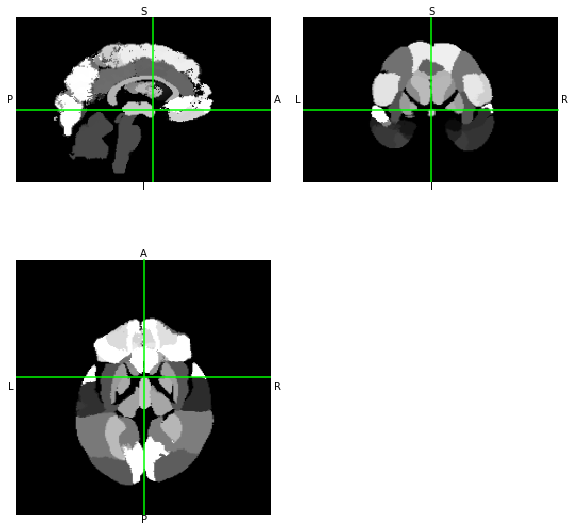

In [83]:
show_mri('/data/slow/MAPER/prep/y/ADNI_MAPER_43_seg.nii', pos=(0,0,0))

# Prep data

In [2]:
prep_dir = Path('/data/slow/MAPER/prep')

df = pd.read_pickle(prep_dir/'metadata.pkl')
df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID,IMG,SEG,split
0,I35475,011_S_0002,CN,M,74,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/26/2005,NiFTI,NaN,I220542,/data/slow/MAPER/ADNI/011_S_0002/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0002/MAPER_segment...,test
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441,/data/slow/MAPER/ADNI/011_S_0005/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0005/MAPER_segment...,train
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442,/data/slow/MAPER/ADNI/011_S_0008/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0008/MAPER_segment...,train
3,I33066,100_S_0015,CN,M,81,1,MRI,MPR-R; ; N3; Scaled,Processed,9/26/2005,NiFTI,NaN,I220463,/data/slow/MAPER/ADNI/100_S_0015/MPR-R____N3__...,/data/slow/MAPER/ADNI/100_S_0015/MAPER_segment...,val
4,I32306,011_S_0016,CN,M,66,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2005,NiFTI,NaN,I220444,/data/slow/MAPER/ADNI/011_S_0016/MPR__GradWarp...,/data/slow/MAPER/ADNI/011_S_0016/MAPER_segment...,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,I60641,020_S_1288,CN,M,60,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/13/2007,NiFTI,NaN,I220993,/data/slow/MAPER/ADNI/020_S_1288/MPR__GradWarp...,/data/slow/MAPER/ADNI/020_S_1288/MAPER_segment...,test
281,I80718,094_S_1267,CN,M,73,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/16/2007,NiFTI,NaN,I221288,/data/slow/MAPER/ADNI/094_S_1267/MPR__GradWarp...,/data/slow/MAPER/ADNI/094_S_1267/MAPER_segment...,val
282,I75503,094_S_1267,CN,M,73,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/22/2007,NiFTI,NaN,I221262,/data/slow/MAPER/ADNI/094_S_1267/MPR__GradWarp...,/data/slow/MAPER/ADNI/094_S_1267/MAPER_segment...,val
283,I71395,013_S_1276,CN,F,72,2,MRI,MPR; GradWarp; N3; Scaled,Processed,3/28/2007,NiFTI,NaN,I221235,/data/slow/MAPER/ADNI/013_S_1276/MPR__GradWarp...,/data/slow/MAPER/ADNI/013_S_1276/MAPER_segment...,train


In [6]:
df['split'].value_counts()

train    167
test      61
val       57
Name: split, dtype: int64

In [9]:
167+61+57

285

In [7]:
df[df['split'] == 'train']

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Seg ID,IMG,SEG,split
1,I32246,011_S_0005,CN,M,74,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/02/2005,NiFTI,NaN,I220441,/data/slow/MAPER/ADNI/011_S_0005/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0005/MAPER_segment...,train
2,I32264,011_S_0008,CN,F,85,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/13/2005,NiFTI,NaN,I220442,/data/slow/MAPER/ADNI/011_S_0008/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0008/MAPER_segment...,train
5,I59375,022_S_0014,CN,F,79,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,9/29/2005,NiFTI,NaN,I220948,/data/slow/MAPER/ADNI/022_S_0014/MPR__GradWarp...,/data/slow/MAPER/ADNI/022_S_0014/MAPER_segment...,train
6,I32389,011_S_0022,CN,M,63,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,10/10/2005,NiFTI,NaN,I220446,/data/slow/MAPER/ADNI/011_S_0022/MPR-R__GradWa...,/data/slow/MAPER/ADNI/011_S_0022/MAPER_segment...,train
8,I45228,067_S_0019,CN,F,73,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,10/12/2005,NiFTI,NaN,I220787,/data/slow/MAPER/ADNI/067_S_0019/MPR__GradWarp...,/data/slow/MAPER/ADNI/067_S_0019/MAPER_segment...,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,I62261,052_S_1250,CN,F,73,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2007,NiFTI,NaN,I221003,/data/slow/MAPER/ADNI/052_S_1250/MPR__GradWarp...,/data/slow/MAPER/ADNI/052_S_1250/MAPER_segment...,train
277,I62680,013_S_1276,CN,F,72,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/05/2007,NiFTI,NaN,I221019,/data/slow/MAPER/ADNI/013_S_1276/MPR__GradWarp...,/data/slow/MAPER/ADNI/013_S_1276/MAPER_segment...,train
278,I82571,100_S_1286,CN,F,76,2,MRI,MPR; ; N3; Scaled,Processed,3/07/2007,NiFTI,8/17/2020,I221299,/data/slow/MAPER/ADNI/100_S_1286/MPR____N3__Sc...,/data/slow/MAPER/ADNI/100_S_1286/MAPER_segment...,train
279,I62272,052_S_1251,CN,F,74,2,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/09/2007,NiFTI,NaN,I221004,/data/slow/MAPER/ADNI/052_S_1251/MPR__GradWarp...,/data/slow/MAPER/ADNI/052_S_1251/MAPER_segment...,train


In [13]:
df_adni = pd.read_csv('/home/bruno-pacheco/brain-age/notebooks/dataframe3D.csv', index_col=0)
df_adni['patient'] = df_adni['patient'].str.replace('ADNI_','')
df_adni.head()

,patient,filename,age,dataset,split
0,109_S_1013,/home/jupyter/data/ADNI/registration/109_S_101...,79,ADNI,train
1,109_S_1013,/home/jupyter/data/ADNI/registration/109_S_101...,78,ADNI,train
2,141_S_6116,/home/jupyter/data/ADNI/registration/141_S_611...,72,ADNI,train
3,141_S_6116,/home/jupyter/data/ADNI/registration/141_S_611...,70,ADNI,train
4,002_S_6680,/home/jupyter/data/ADNI/registration/002_S_668...,64,ADNI,train


In [17]:
a = df_adni.groupby('patient')['split'].first()
a

patient
002_S_0295    train
002_S_0413    train
002_S_0559    train
002_S_0685    train
002_S_1261      val
              ...  
941_S_6570    train
941_S_6574     test
941_S_6575    train
941_S_6580     test
941_S_6581    train
Name: split, Length: 666, dtype: object

In [16]:
b = df.groupby('Subject')['split'].first()
b

Subject
002_S_0295    train
002_S_0413    train
002_S_0559    train
002_S_0685    train
002_S_1261      val
              ...  
941_S_1194    train
941_S_1195    train
941_S_1197    train
941_S_1202      val
941_S_1203    train
Name: split, Length: 226, dtype: object

In [21]:
a = a[a.index.isin(b.index)]
b = b[b.index.isin(a.index)]
a, b

(patient
 002_S_0295    train
 002_S_0413    train
 002_S_0559    train
 002_S_0685    train
 002_S_1261      val
               ...  
 941_S_1194    train
 941_S_1195    train
 941_S_1197    train
 941_S_1202      val
 941_S_1203    train
 Name: split, Length: 216, dtype: object,
 Subject
 002_S_0295    train
 002_S_0413    train
 002_S_0559    train
 002_S_0685    train
 002_S_1261      val
               ...  
 941_S_1194    train
 941_S_1195    train
 941_S_1197    train
 941_S_1202      val
 941_S_1203    train
 Name: split, Length: 216, dtype: object)

In [32]:
assert (a.index == b.index).all()

(a == b).all()

True

In [39]:
s = df.sample().iloc[0]
s

Image Data ID                                               I40172
Subject                                                 136_S_0086
Group                                                           CN
Sex                                                              F
Age                                                             80
Visit                                                            2
Modality                                                       MRI
Description                                      MPR; ; N3; Scaled
Type                                                     Processed
Acq Date                                                 5/08/2006
Format                                                       NiFTI
Downloaded                                               8/18/2020
Seg ID                                                     I220697
IMG              /data/slow/MAPER/ADNI/136_S_0086/MPR____N3__Sc...
SEG              /data/slow/MAPER/ADNI/136_S_0086/MAPER_segmen

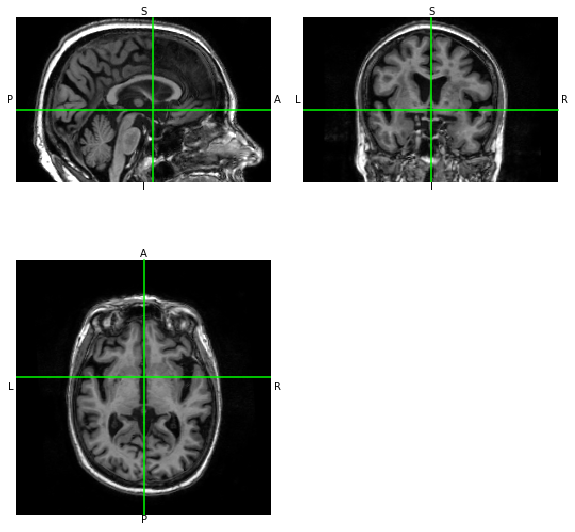

In [44]:
show_mri(f"/data/slow/MAPER/prep/X/ADNI_MAPER_{s.name}.nii", pos=(0,0,0))

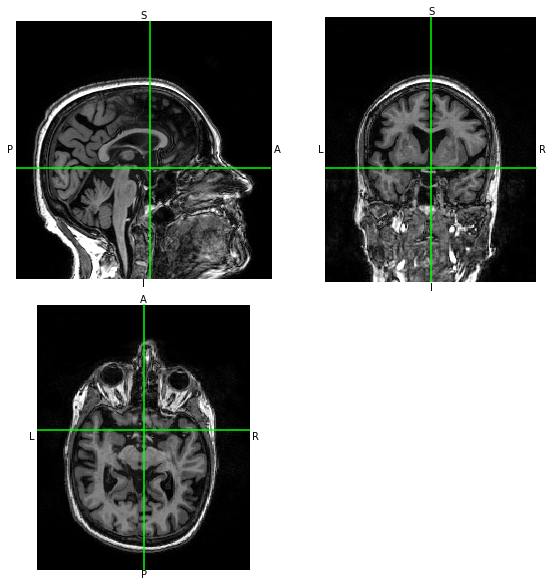

In [58]:
show_mri(s['IMG'], pos=(-80,20,38))